In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Load Data

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/BSC ASSINMENT/Computer Intelligence/Data Set/playground-series-s3e12/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/BSC ASSINMENT/Computer Intelligence/Data Set/playground-series-s3e12/test.csv")

# EDA

In [4]:
train_data.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [5]:
test_data.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [6]:
train_data.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [7]:
test_data.describe()

,id,gravity,ph,osmo,cond,urea,calc
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,551.500000,1.018330,5.939312,654.891304,21.886594,280.985507,4.076848
std,79.818544,0.006569,0.607143,236.361932,7.346069,134.877856,3.088524
min,414.000000,1.005000,4.900000,187.000000,5.100000,64.000000,0.170000
25%,482.750000,1.014000,5.530000,456.000000,17.400000,168.500000,1.527500
50%,551.500000,1.019000,5.730000,658.000000,23.600000,282.000000,3.230000
75%,620.250000,1.023250,6.210000,843.250000,27.600000,385.000000,5.540000
max,689.000000,1.034000,7.940000,1236.000000,38.000000,620.000000,14.340000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB


In [10]:
train_data.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

0    230
1    184
Name: target, dtype: int64 



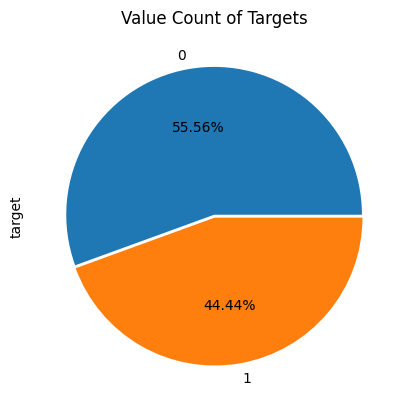

In [11]:
target_count = train_data["target"].value_counts()
print(target_count, "\n")

target_count.plot(kind="pie", autopct="%1.2f%%", explode=(0.01, 0.01))
plt.title("Value Count of Targets")
plt.show()

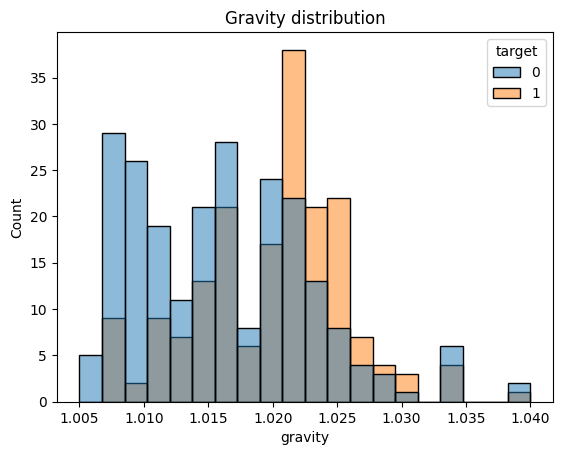

In [12]:
sns.histplot(data =train_data, x = "gravity" ,bins = 20, hue = "target")
plt.title("Gravity distribution")
plt.show()

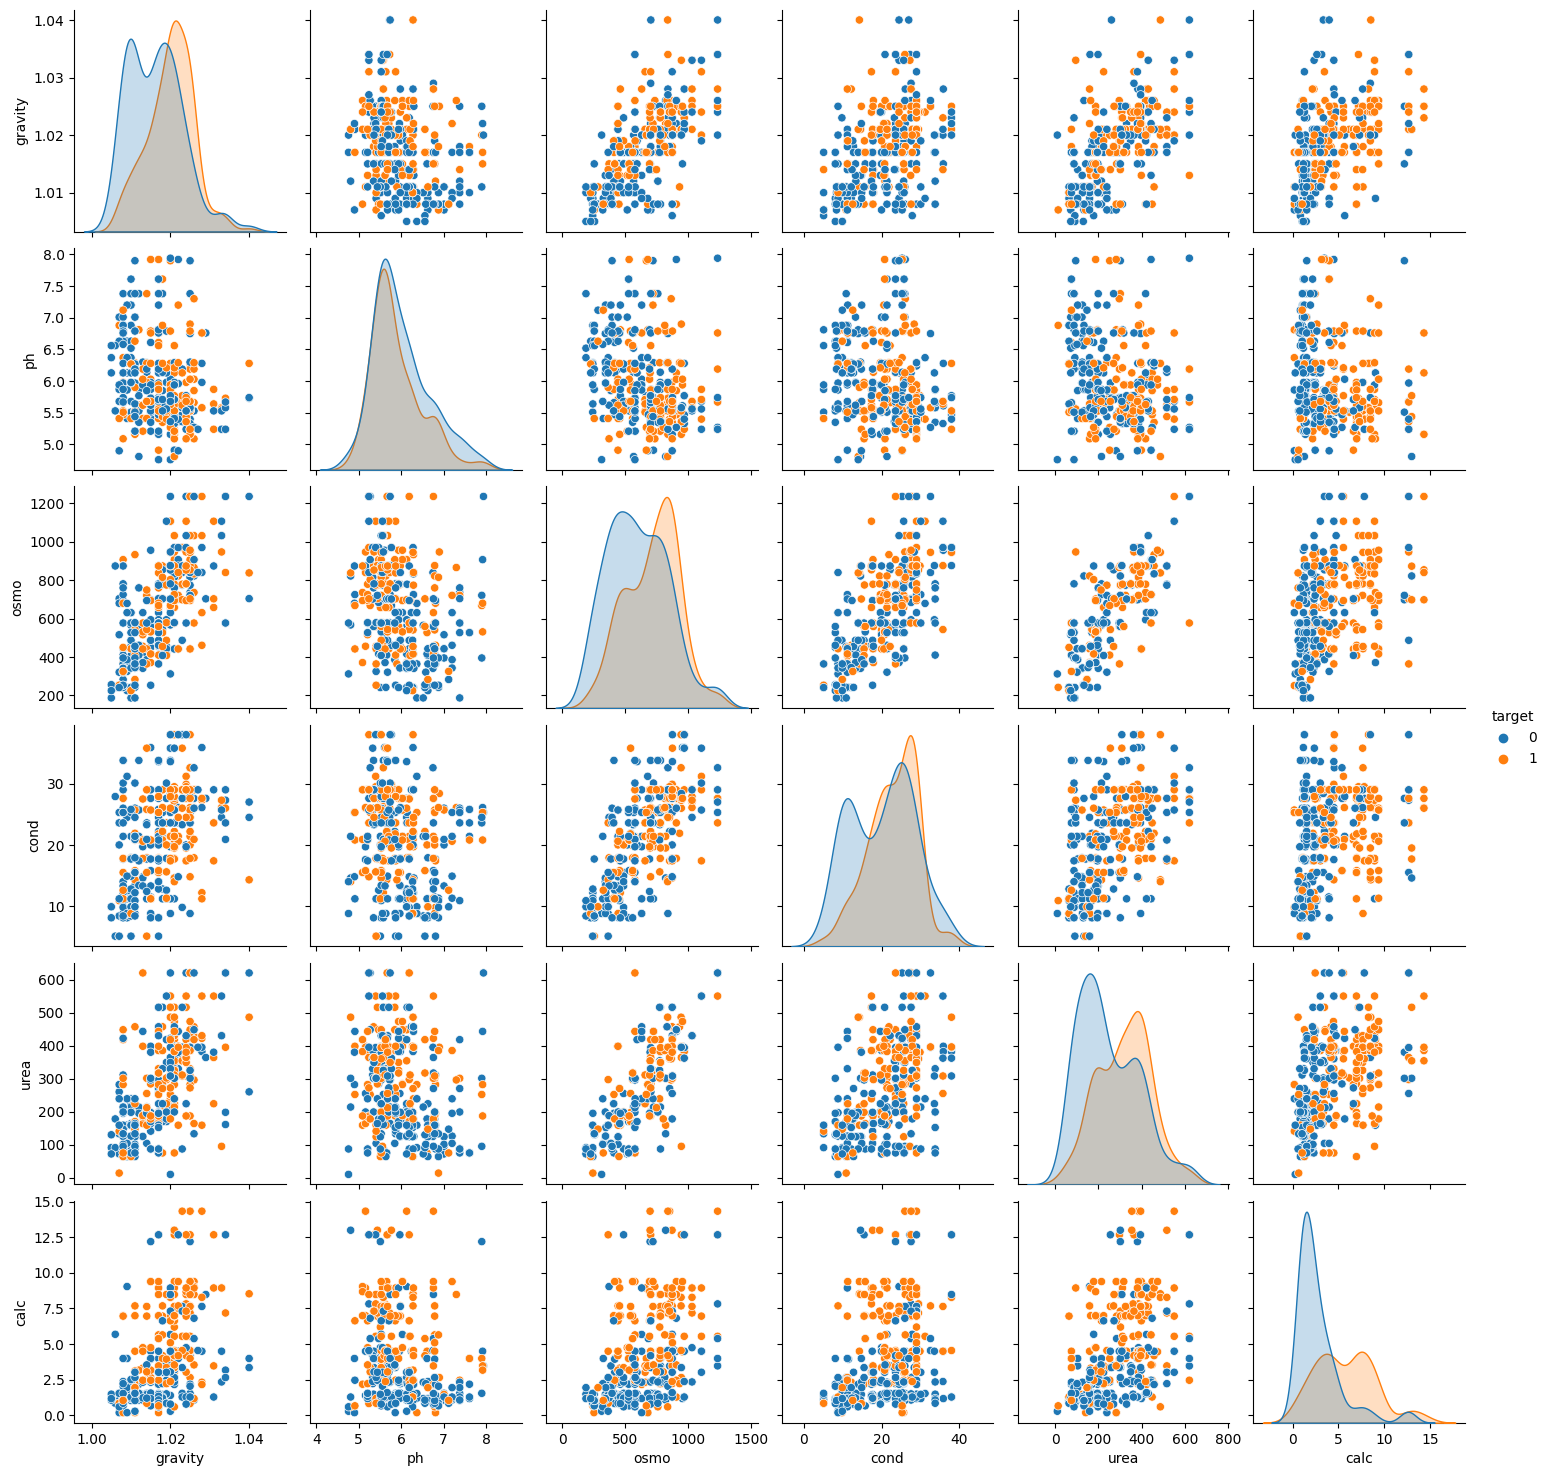

In [13]:
sns.pairplot(data=train_data, vars=['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], hue='target')
plt.show()

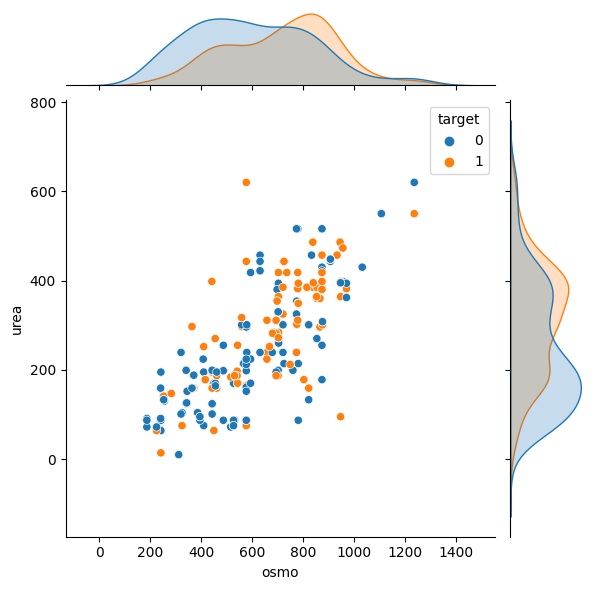

In [14]:
sns.jointplot(data=train_data, x='osmo', y='urea', hue='target')
plt.show()

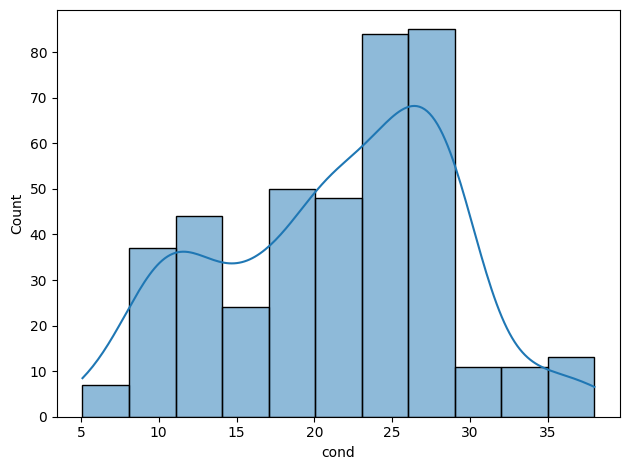

In [15]:
sns.histplot(train_data['cond'], kde=True)
plt.tight_layout()
plt.show()

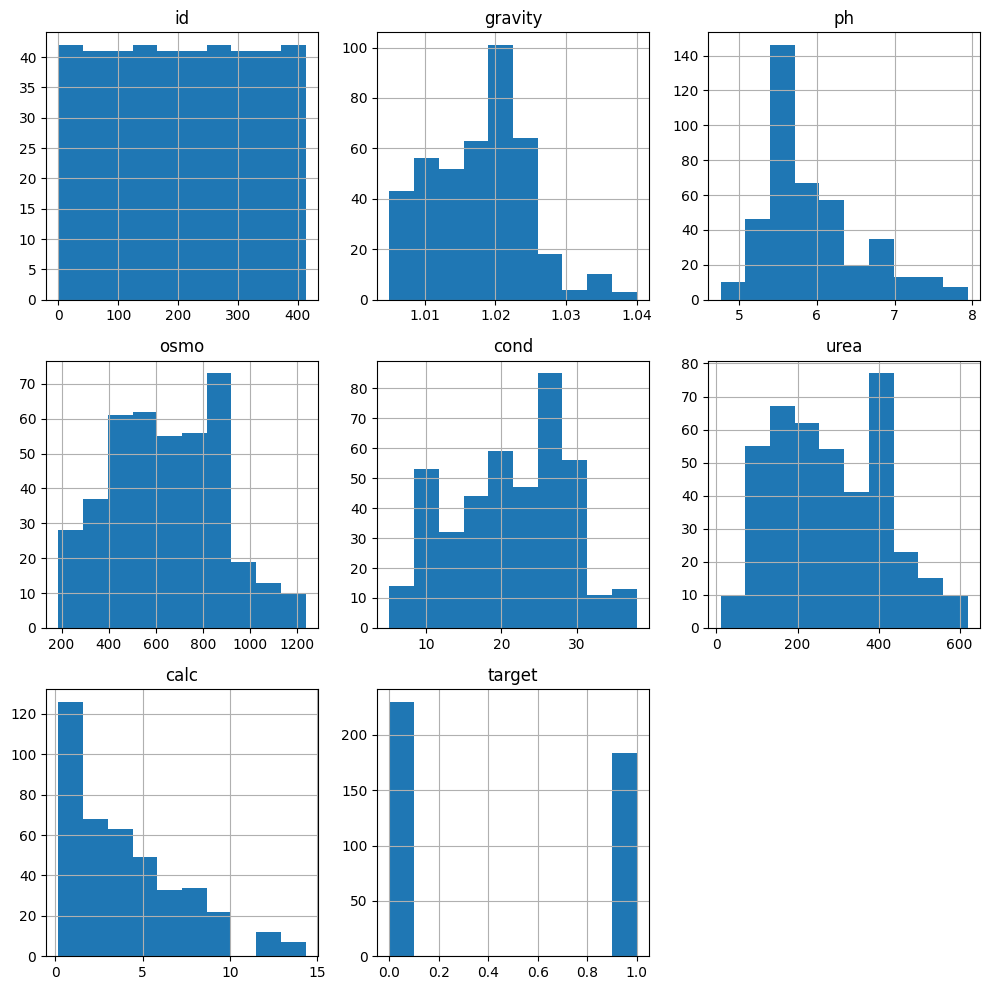

In [16]:
train_data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

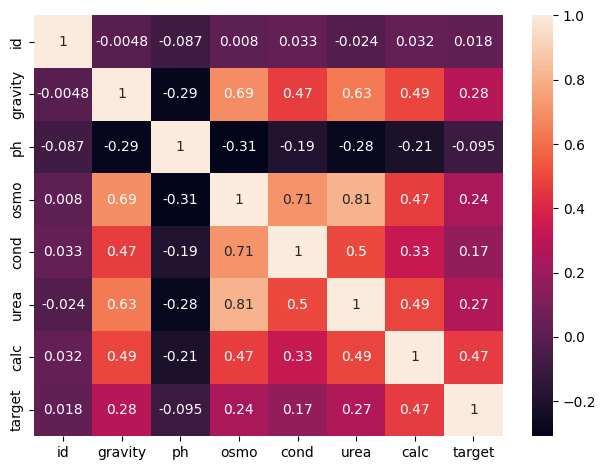

In [17]:
sns.heatmap(train_data.corr(), annot=True)
plt.tight_layout()
plt.show()

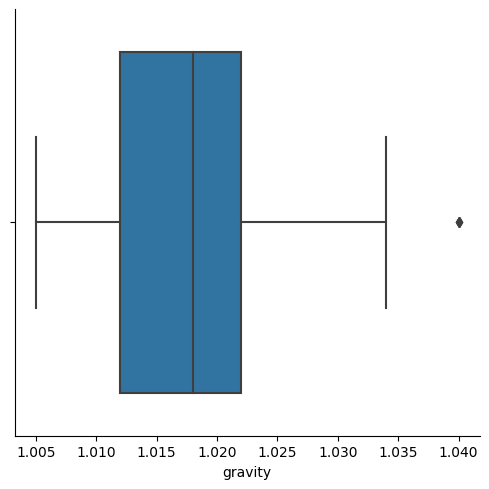

In [18]:
sns.catplot(x='gravity', data = train_data, kind='box')

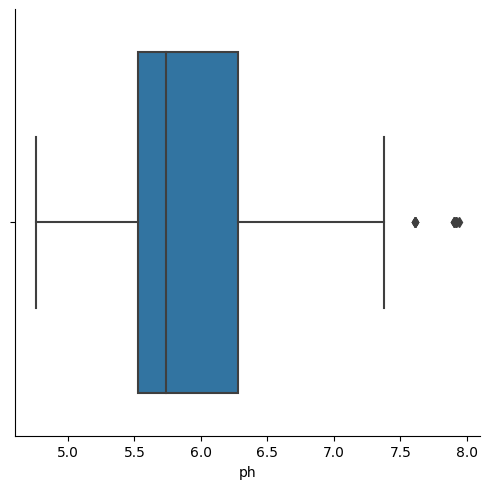

In [19]:
sns.catplot(x='ph', data = train_data, kind='box')

# Data Preprocess

In [20]:

q1 = train_data['ph'].quantile(0.25)
q3 = train_data['ph'].quantile(0.75)

iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

train_data = train_data[(train_data['ph'] >= lower_bound) & (train_data['ph'] <= upper_bound)]

q1 = train_data['gravity'].quantile(0.25)
q3 = train_data['gravity'].quantile(0.75)

iqr = q3 - q1

upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)

train_data = train_data[(train_data['gravity'] >= lower_bound) & (train_data['gravity'] <= upper_bound)]

In [21]:
train_data.shape

(399, 8)

In [22]:
from sklearn.model_selection import train_test_split

features = train_data.drop(['id' ,'target'], axis=1)
labels = train_data["target"]

a_train_data, a_test_data, b_train_data, b_test_data = train_test_split(features, labels, test_size=0.20, random_state=42)

In [23]:
len(a_train_data), len(b_test_data)

(319, 80)

In [24]:
b_test_data.value_counts()

0    47
1    33
Name: target, dtype: int64

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def evaluate(model, X_test, y_test):
	pred = model.predict(X_test)
	accuracy = accuracy_score(y_test, pred)
	precision = precision_score(y_test, pred, average='macro')
	recall = recall_score(y_test, pred, average='macro')
	f1 = f1_score(y_test, pred, average='macro')
	print(classification_report(y_test, pred))
	print('Accuracy: %f' % accuracy)
	print('Precision: %f' % precision)
	print('Recall: %f' % recall)
	print('F1 score: %f' % f1)
	print("================================================================")

In [27]:
DT_clf = DecisionTreeClassifier()
RF_clf = RandomForestClassifier()

In [28]:
models = {
    "RF": RF_clf.fit(a_train_data, b_train_data),
    "DT": DT_clf.fit(a_train_data, b_train_data)
}
for name, model in models.items():
    print(name)

    evaluate(model,a_test_data, b_test_data)

RF
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.81      0.79      0.80        33

    accuracy                           0.84        80
   macro avg       0.83      0.83      0.83        80
weighted avg       0.84      0.84      0.84        80

Accuracy: 0.837500
Precision: 0.833333
Recall: 0.830110
F1 score: 0.831579
DT
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        47
           1       0.76      0.76      0.76        33

    accuracy                           0.80        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.80      0.80      0.80        80

Accuracy: 0.800000
Precision: 0.793681
Recall: 0.793681
F1 score: 0.793681


In [29]:
final_model = RandomForestClassifier()
final_model.fit(a_train_data, b_train_data)

RandomForestClassifier()

In [30]:
test = test_data.drop(['id'], axis=1)

In [31]:
pred = final_model.predict(test)
prediction = test_data[['id']]
prediction['target'] = pred

<ipython-input-31-f34a7324a30f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction['target'] = pred


In [32]:
prediction

,id,target
0,414,0
1,415,1
2,416,1
3,417,0
4,418,0
...,...,...
271,685,1
272,686,0
273,687,1
274,688,0


In [33]:
prediction_prob = final_model.predict_proba(test)[:, 1]
prob = test_data[['id']]
prob['probability'] = prediction_prob

<ipython-input-33-1ce5a37bacae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prob['probability'] = prediction_prob


In [34]:
prob

,id,probability
0,414,0.32
1,415,0.77
2,416,0.83
3,417,0.48
4,418,0.30
...,...,...
271,685,0.66
272,686,0.08
273,687,0.65
274,688,0.15


In [35]:
prob.to_csv('kidney_stone_prediction.csv', index=False)

# Load the random forest classifier model

In [36]:
import pickle
import sklearn

In [37]:
model = open("final_model.pkl", "wb")
pickle.dump(final_model, model)
model.close()

# Create a function to make predictions

In [38]:
final_model.fit(a_train_data, b_train_data)
model = open("final_model.pkl", "wb")
pickle.dump(final_model, model)
model.close()

In [39]:
def predict(gravity, ph, osmo, cond, urea, calc):
    features = pd.DataFrame({
        "gravity": gravity,
        "ph": ph,
        "osmo": osmo,
        "cond": cond,
        "urea": urea,
        "calc": calc
    }, index=[0])
    prediction = model.predict(features)
    return prediction

# Create a Streamlit app

In [40]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 110.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [41]:
import streamlit as st
st.title("kidney_stone_prediction")


2023-09-23 15:34:22.012 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

# Input fields for the features

In [42]:
gravity = st.number_input("Gravity: ")
ph = st.number_input("pH: ")
osmo = st.number_input("Osmolarity: ")
cond = st.number_input("Conductivity: ")
urea = st.number_input("Urea: ")
calc = st.number_input("Calcium: ")

result = ""
if st.button("Predict"):
    result = predict(gravity, ph, osmo, cond, urea, calc)
    st.success('The output is {}'.format(result))